In [24]:
import numpy as np
from numpy.random import binomial #generador aleatorio de números basado en la distribución binomial
from scipy.stats import binom #implementa la funcion binomial con rapidez
from math import factorial
import matplotlib.pyplot as plt

## Probabilidad
Rama de las matemáticas que estudia los fenómenos aleatorios y estocásticos

### Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

Una secuencia de eventos tipo Bernoulli es una secuencia de experimentos independientes que tienen dos posibles\
resultados: éxito o fracaso. Cada experimento tiene una probabilidad de éxito p y una probabilidad de fracaso q = 1 - p.


In [2]:
# Implementación de una distribucion binomial:
# k=número de éxitos, n=número de intentos, p=probabilidad de éxito
def binomial(k: float, n: float, p: float) -> float:
        return factorial(n)/(factorial(k)*factorial(n-k))*pow(p,k)*pow((1-p),(n-k))

In [11]:
#Simulando el lanzamiento de una moneda 
print("La distribución binomial es: {}".format(binomial(2,5,0.5)))

# Con scipy.stats
dist = binom(5,0.5) #número de intentos, probabilidad de éxito
dist.pmf(2) # Función de masa de probabilidad, números de exitos 

La distribución binomial es: 0.3125


0.31249999999999983

Función de densidad acumulada
$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$

In [21]:
def binomial_ac(inicio: float, fin: float, n: float, p: float):
    return sum(factorial(n)/(factorial(k)*factorial(n-k))*pow(p,k)*pow((1-p),(n-k)) for k in range(inicio, fin + 1))

print("La distribución acumulada es {}".format(binomial_ac(0,2,3,0.5)))

La distribución acumulada es 0.875


### Simulaciones de secuencias con generadores aleatorios

Una **distribución teórica** es una distribución de probabilidad que se deriva de un modelo matemático que describe un fenómeno aleatorio.\
Esta distribución se basa en suposiciones y ecuaciones matemáticas que describen la probabilidad de diferentes resultados.

Por otro lado, una **distribución simulada** es una distribución de probabilidad que se obtiene a través de la simulación de un fenómeno\
aleatorio mediante el uso de métodos numéricos o algoritmos. Esta distribución se basa en la generación de números aleatorios que siguen\
un patrón o comportamiento específico.


In [31]:
# Simulación de 100 lanzamientos con 3 monedas
p = 0.5 # probabilidad de éxito
n = 3 # número de monedas

np.random.binomial(n, p)

2

In [34]:
# Generando un experimento de lanzamiento de 3 monedas
arr = []
for _ in range(100):
    arr.append(np.random.binomial(n, p))

In [36]:
# Indicando cuantas veces salió cada valor en el experimento
# 0 caras, 1 cara, 2 caras o 3 caras
np.unique(arr, return_counts=True)

(array([0, 1, 2, 3]), array([16, 36, 39,  9]))

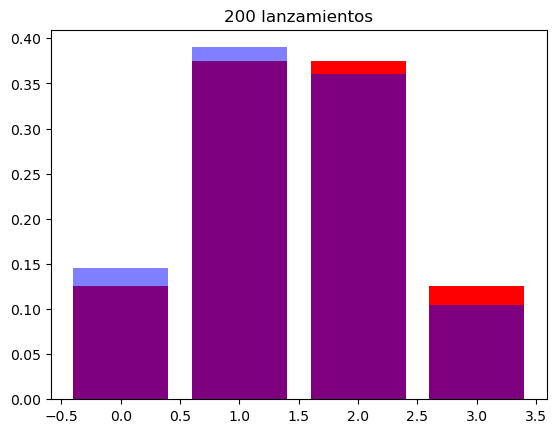

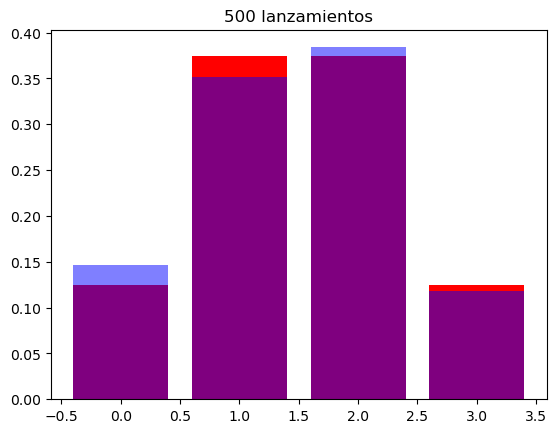

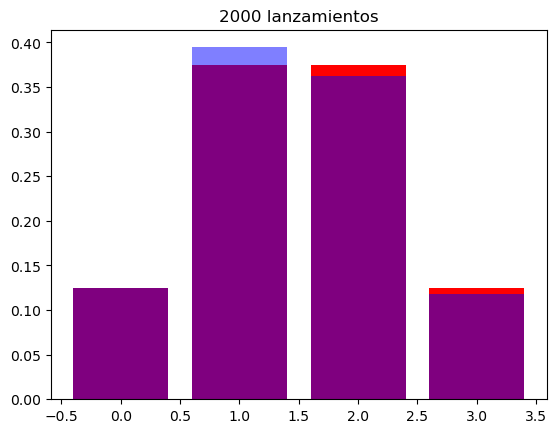

In [57]:
def hist_dist(intentos: float) -> float:
    valores = [0,1,2,3] # valores resultantes
    arr = []

    for _ in range(intentos):
        arr.append(np.random.binomial(3, 0.5))

    simulada = np.unique(arr, return_counts=True)[1]/len(arr) # el porcentaje de cada valor único obtenido
    teorica = [binom(3, 0.5).pmf(k) for k in valores] # probabilidad de que salga cada valor

    plt.bar(valores, teorica, color="red")
    plt.bar(valores, simulada, alpha=0.5, color="blue")
    plt.title(("{} lanzamientos".format(intentos)))
    plt.show()

hist_dist(200)
hist_dist(500)
hist_dist(2000)

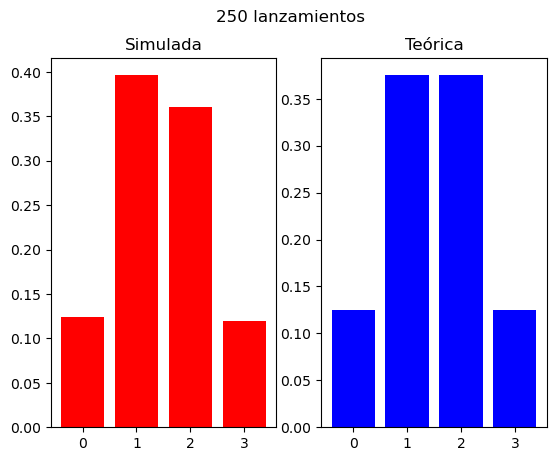

In [48]:
#Realizado con gráficos separados por cada distribución

def hist_dist(intentos: float) -> float:
    valores = [0,1,2,3] # valores resultantes
    arr = []

    for _ in range(intentos):
        arr.append(np.random.binomial(3, 0.5))

    simulada = np.unique(arr, return_counts=True)[1]/len(arr) # el porcentaje de cada valor único obtenido
    teorica = [binom(3, 0.5).pmf(k) for k in valores] # probabilidad de que salga cada valor

    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].bar(valores, simulada, color="red")
    axes[0].set_title("Simulada")
    axes[1].bar(valores, teorica, color="blue")
    axes[1].set_title("Teórica")

    fig.suptitle("{} lanzamientos".format(intentos))

    plt.show()

hist_dist(250)